<center>

<div style="text-align:center"><img src="_static/small_e_logo_cropped.png" width="40%" /></div>
<div style="text-align:center"><img src="_static/pangeo_simple_logo.png" width="175px" /></div>
</center>

Pangeo Tools
===========




A brief overview of the ecosystem of tools used by the [Pangeo Project](http://pangeo.io/).

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import warnings

warnings.simplefilter("ignore", )
np.set_printoptions(precision=4, threshold=5)
xr.set_options(display_width=80)
%config InlineBackend.figure_format = 'retina'

### Pangeo is:

- a community promoting open, reproducible, and scalable science.
- an integrated ecosystem of open source software tools.
- a community platform for Big Data Geoscience.

### Where to find Pangeo:

- Online: http://pangeo.io/
- GitHub: https://github.com/pangeo-data/
- Discourse: https://discourse.pangeo.io/

<div style="text-align:center"><img src="_static/scientific_python_eco.png" width="100%" /></div>


## The Basics

NumPy / SciPy / Pandas/ Jupyter


### NumPy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

In [2]:
import numpy as np

x = np.ones((4, 2))
x.sum(axis=1)

array([2., 2., 2., 2.])

### SciPy

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It contains subpackages that cover:

- clustering
- FFTs
- interpolation
- linear algebra
- singal processing
- stats
- optimization

In [3]:
from scipy import spatial
x, y = np.mgrid[0:5, 2:8]
tree = spatial.KDTree(list(zip(x.ravel(), y.ravel())))
pts = np.array([[0, 0], [2.1, 2.9]])
tree.query(pts)

tree.query(pts[0])

(2.0, 0)

### Pandas

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. Pandas is well suited for:

- Tabular data types (see `Series` and `DataFrame` objects)
- Timeseries data manipulation like resampling
- Database-like operations like aligning, merging, joining, reshaping, and grouping

,tasmin_day_CESM1-BGC_rcp85,tasmax_day_CESM1-BGC_rcp85
time,,
2006-01-01 00:00:00+00:00,276.406952,282.237305
2006-01-02 00:00:00+00:00,273.133514,282.225494
2006-01-03 00:00:00+00:00,272.838989,284.240356
2006-01-04 00:00:00+00:00,279.459961,285.666504
2006-01-05 00:00:00+00:00,278.907623,285.405121


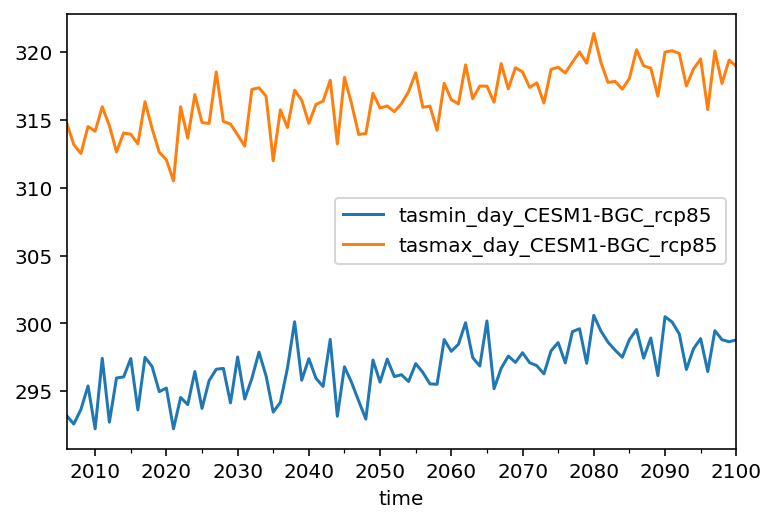

In [4]:
import pandas as pd

df = pd.read_csv('./data/chico_temperature.csv', index_col=0, parse_dates=True)
display(df.head())
df.resample('AS').max().plot()

## Jupyter

<img src="https://jupyter.org/assets/main-logo.svg" align="right" width=10% alt="Jupyter Logo">

Project Jupyter exists to develop open-source software, open-standards, and services for interactive computing across dozens of programming languages.

Components:

- JupyterLab: a web-based interactive development environment for Jupyter notebooks
- JupyterHub: a multi-user gateway to Jupyter sessions

**Jupyterlab**: a web-based interactive development environment for Jupyter notebooks

![image.png](https://jupyterlab.readthedocs.io/en/stable/_images/jupyterlab.png)

**JupyterHub**: a multi-user gateway to Jupyter sessions

![image.png](_static/jupyter-hub.png)

#### ocean.pangeo.io
![image.png](_static/ocean.pangeo.io.png)

#### jupyterhub.ucar.edu
![image.png](_static/jupyterhub.ucar.edu.png)

## Legacy Climate Science Tools

![legacy tools](_static/legacy_tools.png)

## Legacy Tools

### Pros

- "Metadata aware" -- understand the relationships between variables, coordinates, etc.
- "Lazy evaluation" -- don't perform computations until results are actually needed
- Built-in visualization

### Cons

- Hard to scale up, don't handle big data well
- Hard to hack / extend / modify
- Isolated from broader software ecosystem

_Can we have the best of both worlds?_

## Xarray (http://xarray.pydata.org)

<!-- <div style="text-align:center"><img src="_static/dataset-diagram.png" width="50%" /></div> -->
<img src="_static/dataset-diagram.png" align="right" width=66% alt="Xarray Dataset">


Xarray is a Python library that provides data structures and tools for working with multidimensional labeled datasets and arrays. Xarray enables users to perform operations on complex datasets making it a powerful high-level tool for data analysis. 

- Inspired by Pandas and NetCDF
- Labeled N-Dimensional data structures (`DataArray` and `Dataset`)
- Toolkit for data manipulation and visualization
- Integrates with scientific Python ecosystem (Pandas/Matplotlib/Dask/etc)
- Backend support for a wide range of ND data formats (NetCDF, GRIB, Raster, Zarr)


#### xarray.Dataset

In [5]:
import xarray as xr
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

#### xarray.DataArray

In [6]:
da = ds['air']

da.isel(time=0, lat=5, lon=10)  # select using integer index
da.sel(time='2013-01-01T18:00:00', lat=62.5, lon=225.0)  # select based on label

<xarray.DataArray 'air' ()>
array(265.6, dtype=float32)
Coordinates:
    lat      float32 62.5
    lon      float32 225.0
    time     datetime64[ns] 2013-01-01T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [7]:
# resample data to monthly means
da_month = da.resample(time='MS').mean('time')

da_climo = da_month.groupby('time.month').mean('time')
da_climo
# remove the monthly climotology
da_no_climo = da_month.groupby('time.month') - da_climo
da_no_climo

<xarray.DataArray 'air' (time: 24, lat: 25, lon: 53)>
array([[[-1.8830e+00, -1.7224e+00, -1.5447e+00, ..., -5.6949e-01,
         -6.8140e-01, -9.7075e-01],
        [-1.7842e+00, -1.8847e+00, -1.9828e+00, ..., -9.4641e-01,
         -1.4636e+00, -2.0473e+00],
        [-1.1976e+00, -1.3616e+00, -1.6069e+00, ..., -1.4143e+00,
         -2.0173e+00, -2.5605e+00],
        ...,
        [-1.2268e-02, -9.3292e-02, -3.0396e-01, ...,  1.8198e-01,
          2.2726e-01,  2.1976e-01],
        [-7.5165e-02, -1.5298e-01, -3.1201e-01, ...,  2.3163e-01,
          2.5934e-01,  3.3539e-01],
        [-1.0107e-01, -1.9641e-01, -3.1384e-01, ...,  2.8638e-01,
          3.2162e-01,  4.0231e-01]],

       [[-5.9432e+00, -5.7043e+00, -5.5368e+00, ..., -2.5308e-01,
         -2.8201e-01, -4.9911e-01],
        [-5.8669e+00, -5.6905e+00, -5.5644e+00, ...,  3.6740e-01,
          5.8716e-02, -3.3881e-01],
        [-3.7471e+00, -3.5462e+00, -3.5729e+00, ...,  9.8732e-01,
          4.3275e-01, -6.3873e-02],
        ...,


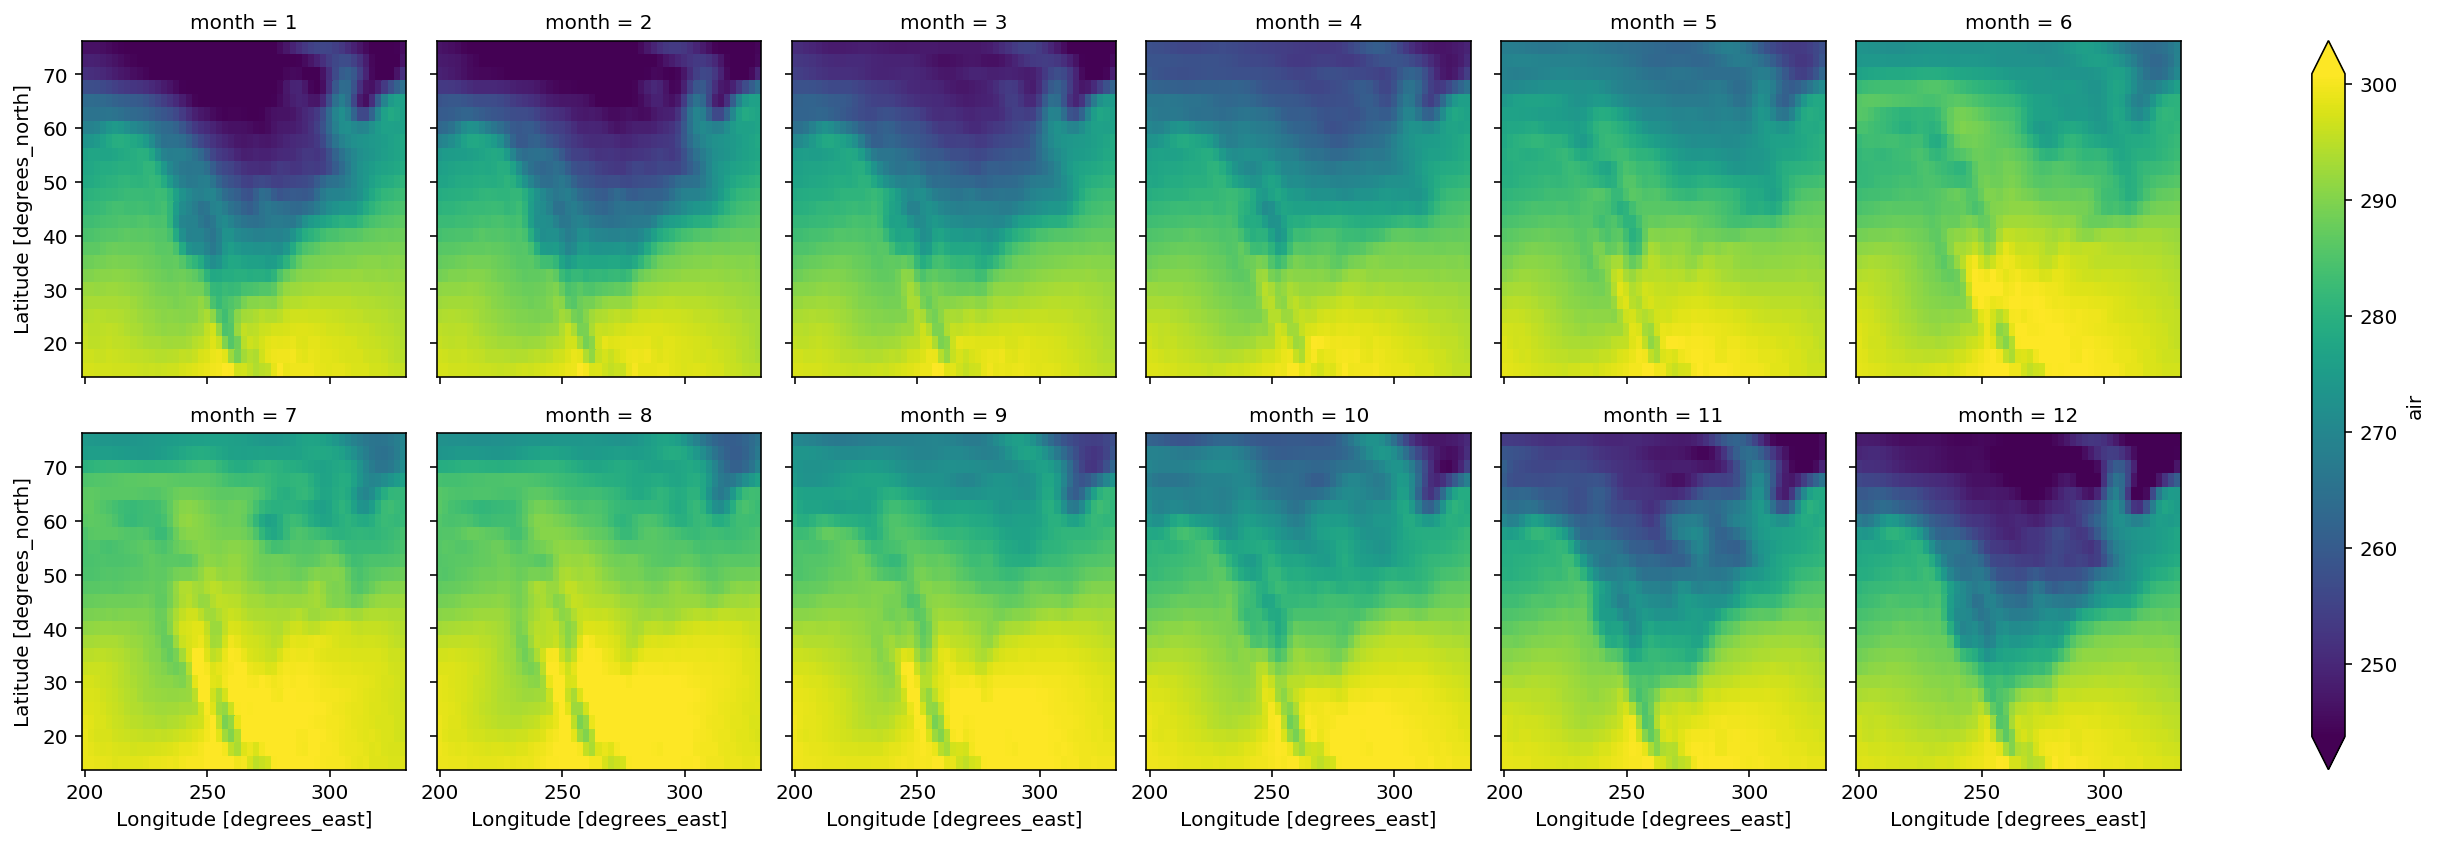

In [8]:
# integrated plotting
da_climo.plot(col='month', col_wrap=6, robust=True)

## Dask

<img src="https://dask.readthedocs.io/en/latest/_images/dask_horizontal.svg" align="right" width=50% alt="Dask Logo">

Dask is a flexible parallel computing library for analytic computing. Dask provides dynamic parallel task scheduling and high-level big-data collections like dask.array and dask.dataframe.

- Dask Array implements a subset of the NumPy ndarray interface using blocked algorithms, cutting up the large array into many small arrays.
- Tools like Xarray and Iris use Dask arrays under-the-hood
- Dask can be deployed on a local computer, HPC, or the Cloud

## Dask Arrays

A dask array looks and feels a lot like a numpy array. However, a dask array doesn't directly hold any data. Instead, it symbolically represents the computations needed to generate the data. Nothing is actually computed until the actual numerical values are needed. This mode of operation is called "lazy"; it allows one to build up complex, large calculations symbolically before turning them over the scheduler for execution.

In [9]:
# Numpy
import numpy as np
shape = (1000, 4000)
ones_np = np.ones(shape)
ones_np

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [10]:
# Dask
import dask.array as da
chunk_shape = (1000, 1000)
ones = da.ones(shape, chunks=chunk_shape)
ones

dask.array<ones, shape=(1000, 4000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

### Deploying Dask

The Dask Schedulers orchestrate the tasks in the Task Graphs so that they can be run in parallel. How they run in parallel, though, is determined by which Scheduler you choose.

There are 3 *local* schedulers:

- **Single-Thread Local**: For debugging, profiling, and diagnosing issues
- **Multi-threaded**: Using the Python built-in threading package (the default for all Dask operations except Bags)
- **Multi-process**: Using the Python built-in multiprocessing package (the default for Dask Bags)

and 1 distributed scheduler, which we will talk about later:

- **Distributed**: Using the dask.distributed module (which uses tornado for TCP communication). The distributed scheduler uses a Cluster to manage communication between the scheduler and the "workers". This is described in the next section.

### Distributed Clusters (http://distributed.dask.org/)
Dask can be deployed on distributed infrastructure, such as a an HPC system or a cloud computing system.

- LocalCluster - Creates a Cluster that can be executed locally. Each Cluster includes a Scheduler and Workers.
- Client - Connects to and drives computation on a distributed Cluster

**Dask Jobqueue (http://jobqueue.dask.org/)**
- PBSCluster
- SlurmCluster
- etc.

**Dask Kubernetes (http://kubernetes.dask.org/)**
- KubeCluster

```python
from dask.distributed import Client
```

```python
# On Cheyenne (PBS)
from dask_jobqueue import PBSCluster
cluster = PBSCluster(project=...)

# On Casper (Slurm)
from dask_jobqueue import SlurmCluster
cluster = SlurmCluster(project=...)

```

```python
# On the cloud
from dask_kubernetes import KubeCluster
cluster = KubeCluster()
```

```python
# use adaptive scaling!
cluster.adapt(0, 30)
client = Client(cluster)
```

## Visualization

Python a rich ecosystem of data visualization tools.

- Matplotlib: Python 2D plotting library which produces publication quality figures
- Holoviz (Bokeh, Hvplot, Datashader, Panel): browser-based data visualization in Python
- Cartopy: geospatial maps, projections, and annotations

### Bokeh / hvplot example: https://hvplot.pyviz.org/

In [11]:
import hvplot.xarray  # noqa
ds = xr.tutorial.load_dataset('air_temperature')

air1d = ds['air'].sel(lat=40, lon=285)
air1d.hvplot()

:Curve   [time]   (air)

### Datashader example: http://datashader.org/index.html

In [12]:
import holoviews as hv
import datashader
from holoviews.operation.datashader import regrid, shade, datashade

hv_ds = hv.Dataset(ds['air'])
qm = hv_ds.to(hv.QuadMesh, kdims=["lon", "lat"], dynamic=True)

In [13]:
%%opts QuadMesh [width=800 height=500 colorbar=True] (cmap='magma') 
regrid(qm, precompute=True)

:DynamicMap   [time]
   :QuadMesh   [lon,lat]   (air)

### Cartopy + Matplotlib + Xarray example: https://scitools.org.uk/cartopy/docs/latest/

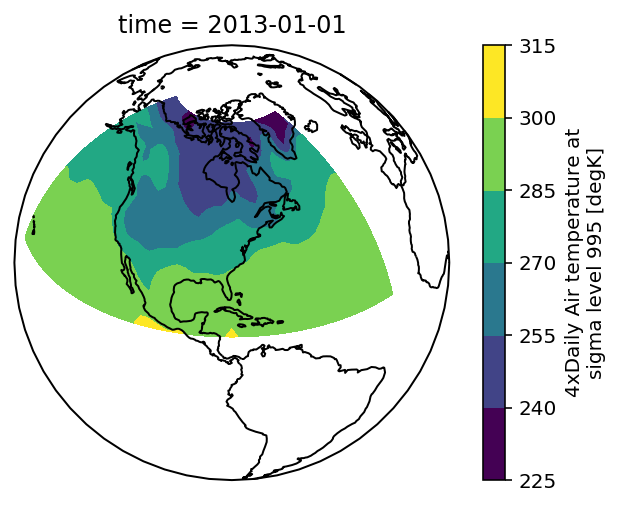

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ds['air'].isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

## Intake Data Catalogs

<img src="https://intake.readthedocs.io/en/latest/_static/images/logo.png" align="right" width=20% alt="Dask Logo">

Taking the pain out of data access and distribution

Intake is a lightweight package for finding, investigating, loading and disseminating data.

In [15]:
import intake
cat = intake.open_catalog('catalog.yml')
display(list(cat))

display(cat['hadcrut4'].describe())

['hadcrut4']

{'name': 'hadcrut4',
 'container': 'xarray',
 'plugin': ['netcdf'],
 'description': 'HADCRUT4',
 'direct_access': 'forbid',
 'user_parameters': [],
 'metadata': {},
 'args': {'urlpath': 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cru/hadcrut4/air.mon.anom.median.nc',
  'chunks': {}}}

In [16]:
cat['hadcrut4'].to_dask()

<xarray.Dataset>
Dimensions:    (lat: 36, lon: 72, nbnds: 2, time: 2036)
Coordinates:
  * lat        (lat) float32 87.5 82.5 77.5 72.5 ... -72.5 -77.5 -82.5 -87.5
  * lon        (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * time       (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2019-08-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] dask.array<chunksize=(2036, 2), meta=np.ndarray>
    air        (time, lat, lon) float32 dask.array<chunksize=(2036, 36, 72), meta=np.ndarray>
Attributes:
    platform:                        Surface
    title:                           HADCRUT4 Combined Air Temperature/SST An...
    history:                         Originally created at NOAA/ESRL PSD by C...
    Conventions:                     CF-1.0
    Comment:                         This dataset supersedes V3
    Source:                          Obtained from http://hadobs.metoffice.co...
    version:                       

## Climate-Specific Packages

Everything we just showed was very general purpose.

Now a brief tour of some more specialized tools.

## Principles for Pangeo Packages

- Consume and produce xarray data structures (don't do I/O)
- Operate eagerly on NumPy inputs and lazily on Dask inputs 
- Follow existing metadata standards (e.g. CF convetions)
- Keep it as simple as possible! Solve one problem well

This favors many small, specialized packages.

## xESMF: Universal Regridder for Geospatial Data

<https://xesmf.readthedocs.io/en/latest/>

- **Powerful**: It uses ESMF/ESMPy as backend and can regrid between general curvilinear grids with all ESMF regridding algorithms, such as bilinear, conservative and nearest neighbour.
- **Easy-to-use**: It abstracts away ESMF’s complicated infrastructure and provides a simple, high-level API, compatible with xarray as well as basic numpy arrays.
- **Fast**: It is faster than ESMPy’s original Fortran regridding engine in serial case, and also supports dask for out-of-core, parallel computation.



In [17]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

### Curvilinear Coordinates

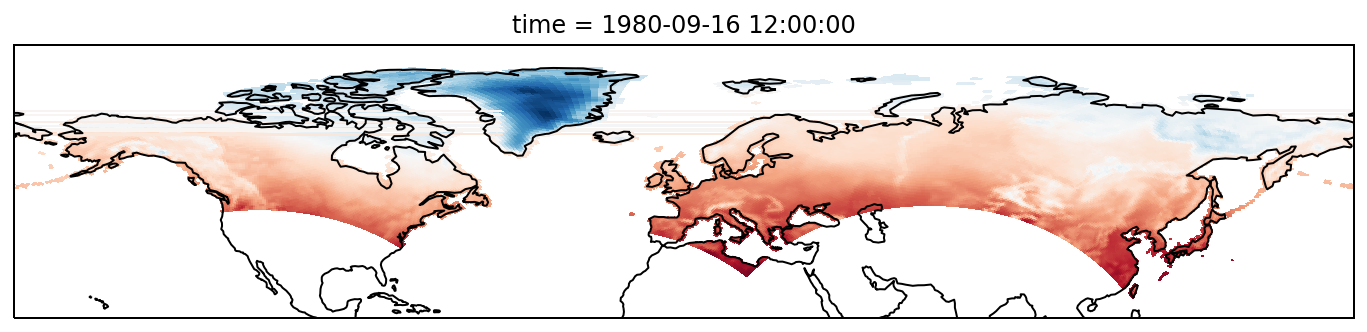

In [18]:
ds = xr.tutorial.load_dataset('rasm')
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ds.Tair[0].plot(x='xc', y='yc', ax=ax, add_colorbar=False)

### Output Grid

A regular, coarse resolution lat-lon grid.

In [19]:
import xesmf
ds_out = xesmf.util.grid_global(5, 4)
ds_out

<xarray.Dataset>
Dimensions:  (x: 72, x_b: 73, y: 45, y_b: 46)
Coordinates:
    lon      (y, x) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
    lat      (y, x) float64 -88.0 -88.0 -88.0 -88.0 ... 88.0 88.0 88.0 88.0
    lon_b    (y_b, x_b) int64 -180 -175 -170 -165 -160 ... 160 165 170 175 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

In [20]:
dsr = ds.rename({'xc': 'lon', 'yc': 'lat'})
regridder = xesmf.Regridder(dsr, ds_out, 'bilinear')
ds_out = regridder(dsr.Tair)
ds_out

Overwrite existing file: bilinear_205x275_45x72.nc 
 You can set reuse_weights=True to save computing time.


<xarray.DataArray 'Tair' (time: 36, y: 45, x: 72)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0

## climpred: analysis of ensemble forecast models for climate prediction

<https://climpred.readthedocs.io/en/stable/>

> climpred aims to be the primary package used to analyze output from initialized dynamical forecast models, ranging from short-term weather forecasts to decadal climate forecasts. The code base will be driven entirely by the geoscientific prediction community through open source development. It leverages xarray to keep track of core prediction ensemble dimensions (e.g., ensemble member, initialization date, and lead time) and dask to perform out-of-memory computations on large datasets.

## EOFS: EOF analysis of spatial-temporal data

<https://ajdawson.github.io/eofs/latest/>

- Suitable for large data sets: computationally efficient for the large output data sets of modern climate models.
- Transparent handling of missing values: missing values are removed automatically during computations and placed back into output fields.
- Automatic metadata: metadata from input fields is used to construct metadata for output fields.
- No Compiler required: a fast implementation written in pure Python using the power of numpy, no Fortran or C dependencies.

```python
from eofs.xarray import Eof
solver = Eof(sst_anom_detrended, weights=np.sqrt(weights))
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)
eof1.sel(mode=0).plot()
```

![eofs result](_static/eofs_output.png)

## Regionmask: create masks of geographical regions

<https://regionmask.readthedocs.io/en/stable/>

<img src="https://regionmask.readthedocs.io/en/stable/_images/logo.png" align="right" width=45% alt="Regionmask">

- contains a number of defined regions, including: countries (from Natural Earth), a landmask and regions used in the scientific literature (the Giorgi regions and the SREX regions).
- can plot figures of these regions) with matplotlib and cartopy
- can be used to create masks of the regions for arbitrary longitude and latitude grids with numpy and xarray 

## XGCM: Finite Volume Grid Cell Operations


![xgcm](_static/xgcm_logo.png)

<https://xgcm.readthedocs.io/en/latest/>

### Climate Models use Arakawa Grids

![grids](https://xgcm.readthedocs.io/en/latest/_images/grid2d_hv.svg)

But Xarray doesn't understand "cell center" vs. "cell face".

### XGCM to the rescue!

Difference operator:
    
$$ \delta_i \Phi = \Phi_{i+1/2} - \Phi_{i-1/2} $$

Interpolation operator:

$$ \overline{\Phi} = (\Phi_{i+1/2} + \Phi_{i-1/2})/2 $$

```python
import xgcm
grid = xgcm.Grid(ds, periodic=['X', 'Y'])
data_interp = grid.interp(ds.data)
data_diff = grid.diff(ds.data)
```

## Xhistogram

<https://xhistogram.readthedocs.io/en/latest>

> Histograms are the foundation of many forms of data analysis. The goal of xhistogram is to make it easy to calculate weighted histograms in multiple dimensions over n-dimensional arrays, with control over the axes. Xhistogram builds on top of xarray, for automatic coordiantes and labels, and dask, for parallel scalability

```python
from xhistogram.xarray import histogram
hTS = histogram(salt, temp,
                bins=[salt_bins, temp_bins])
hTS.plot(levels=31)
```

![xhistogram result](https://xhistogram.readthedocs.io/en/latest/_images/tutorial_20_2.png)

## Lots more! Checkout github.com/pangeo-data/awesome-open-climate-science